In [1]:
#Import the required lybraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from math import floor
from termcolor import colored as cl
import seaborn as sb
import numpy as np
import fundamentalanalysis as fa
import yfinance as yf

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [3]:
def get_historical_data(symbol):
    
    # Request historic pricing data via finance.yahoo.com API
    df = yf.Ticker(symbol).history(period='1mo')[['Close', 'Open', 'High', 'Volume']]
    return df

In [4]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

In [5]:
def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

In [6]:
#BOLLINGER BANDS
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=9):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

In [7]:
#RSI
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

In [8]:
api="70bafc9e930c8257b84552a4ef6e7f88"
class Price_analysis:
    def __init__(self,ticker,api_key,**kwargs):
        self.ticker=ticker
        self.api_key=api_key
        self.dcf_annually = fa.discounted_cash_flow(self.ticker, self.api_key, period="annual")
        super().__init__(**kwargs)
    def Value_analysis(self):
        return self.dcf_annually
    def show_plot(self):
        x = self.dcf_annually.iloc[1]
        y= self.dcf_annually.iloc[2]
        plt.figure(figsize=(20,5))
        plt.plot(x,label="Actual price")
        plt.plot(y,label="Projected price")
       
        plt.legend()
    def balance_sheet(self):
        cash_flow_statement_annually = fa.cash_flow_statement(self.ticker, self.api_key, period="annual")
        return cash_flow_statement_annually


In [9]:
ticker="AAPL"

In [10]:
Price_analysis=Price_analysis(ticker,api)

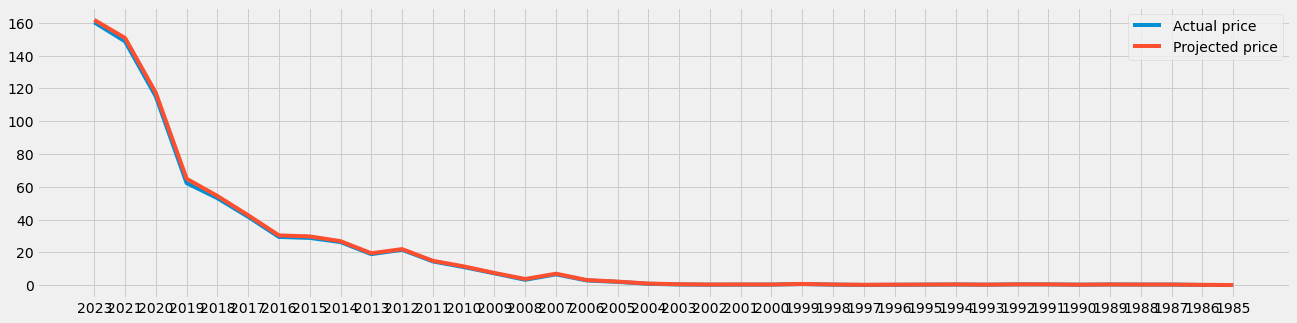

In [11]:
Price_analysis.show_plot()

In [12]:
Price_analysis.Value_analysis()

,2023,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
date,2023-03-25,2021-09-25,2020-09-26,2019-09-28,2018-09-29,2017-09-30,2016-09-24,2015-09-26,2014-09-27,2013-09-28,...,1994-09-30,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30,1988-09-30,1987-09-30,1986-09-30,1985-09-30
Stock Price,160.25,148.639999,115.050003,62.262501,53.060001,41.68,29.4125,28.82,26.2775,18.924286,...,0.376116,0.274554,0.46875,0.444196,0.271205,0.408482,0.34375,0.344866,0.152902,0.084821
DCF,161.698381,150.732056,117.240859,64.906814,54.367319,42.652209,30.348558,29.737715,26.846222,19.47463,...,0.466615,0.32616,0.505177,0.489115,0.297834,0.438996,0.368385,0.383374,0.19299,0.109404


In [13]:
Price_analysis.balance_sheet()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
cik,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,...,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193,0000320193
fillingDate,2022-10-28,2021-10-29,2020-10-30,2019-10-31,2018-11-05,2017-11-03,2016-10-26,2015-10-28,2014-10-27,2013-10-30,...,1998-09-25,1997-12-05,1996-12-19,1995-12-19,1994-12-13,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30
acceptedDate,2022-10-27 18:01:14,2021-10-28 18:04:28,2020-10-29 18:06:25,2019-10-30 18:12:36,2018-11-05 08:01:40,2017-11-03 08:01:37,2016-10-26 16:42:16,2015-10-28 16:31:09,2014-10-27 17:11:55,2013-10-29 20:38:28,...,1998-09-24 20:00:00,1997-12-05 00:00:00,1996-12-19 00:00:00,1995-12-19 00:00:00,1994-12-13 00:00:00,1993-09-29 20:00:00,1992-09-29 20:00:00,1991-09-29 20:00:00,1990-09-29 20:00:00,1989-09-29 20:00:00
calendarYear,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
netIncome,99803000000,94680000000,57411000000,55256000000,59531000000,48351000000,45687000000,53394000000,39510000000,37037000000,...,309000000,-1045000000,-816000000,424000000,310178000,86600000,530400000,309800000,474900000,454000000
depreciationAndAmortization,11104000000,11284000000,11056000000,12547000000,10903000000,10157000000,10505000000,11257000000,7946000000,6757000000,...,111000000,118000000,156000000,127000000,167958000,166100000,217200000,204400000,202700000,124800000
deferredIncomeTax,895000000,-4774000000,-215000000,-340000000,-32590000000,5966000000,4938000000,1382000000,2347000000,1141000000,...,1000000,-7000000,-439000000,73000000,40800000,19000000,100900000,8000000,138900000,111300000
stockBasedCompensation,9038000000,7906000000,6829000000,6068000000,5340000000,4840000000,4210000000,3586000000,2863000000,2253000000,...,0,0,0,0,0,0,0,0,0,0


In [14]:
hist_data=get_historical_data(ticker)
hist_data

,Close,Open,High,Volume
Date,,,,
2023-02-27 00:00:00-05:00,147.919998,147.710007,149.169998,44998500
2023-02-28 00:00:00-05:00,147.410004,147.050003,149.080002,50547000
2023-03-01 00:00:00-05:00,145.309998,146.830002,147.229996,55479000
2023-03-02 00:00:00-05:00,145.910004,144.380005,146.710007,52238100
2023-03-03 00:00:00-05:00,151.029999,148.039993,151.110001,70668500
2023-03-06 00:00:00-05:00,153.830002,153.789993,156.300003,87558000
2023-03-07 00:00:00-05:00,151.600006,153.699997,154.029999,56182000
2023-03-08 00:00:00-05:00,152.869995,152.809998,153.470001,47204800
2023-03-09 00:00:00-05:00,150.589996,153.559998,154.539993,53833600


In [15]:
hist_data_macd = get_macd(hist_data['Close'], 26, 12, 9)
hist_data_macd.tail()

,macd,signal,hist
Date,,,
2023-03-20 00:00:00-04:00,1.895375,1.170311,0.725064
2023-03-21 00:00:00-04:00,2.270050,1.390258,0.879791
2023-03-22 00:00:00-04:00,2.422060,1.596619,0.825441
2023-03-23 00:00:00-04:00,2.601303,1.797555,0.803747
2023-03-24 00:00:00-04:00,2.817390,2.001522,0.815868


In [16]:
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

In [17]:
buy_price, sell_price, macd_signal = implement_macd_strategy(hist_data['Close'], hist_data_macd)
hist_data.index = np.arange(hist_data.shape[0])
closing_prices = hist_data['Close']
bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

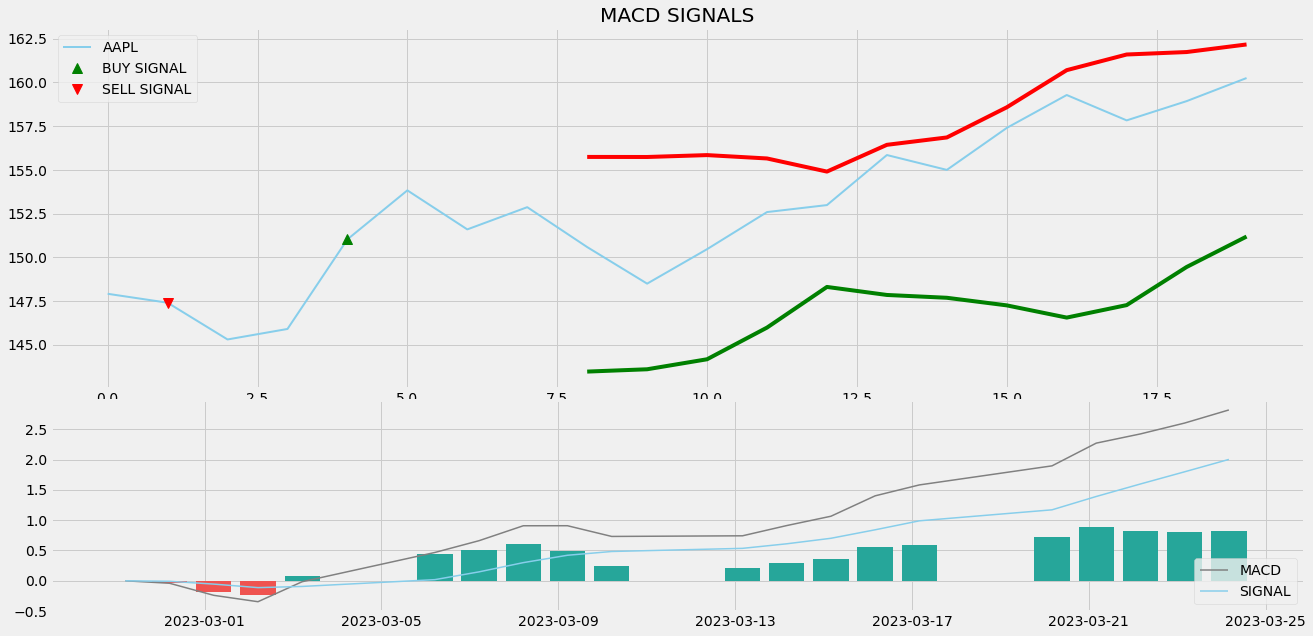

In [18]:
ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(hist_data['Close'], color = 'skyblue', linewidth = 2, label = ticker)
ax1.plot(hist_data.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(hist_data.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('MACD SIGNALS')
ax2.plot(hist_data_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(hist_data_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(hist_data_macd)):
    if str(hist_data_macd['hist'][i])[0] == '-':
        ax2.bar(hist_data_macd.index[i], hist_data_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(hist_data_macd.index[i], hist_data_macd['hist'][i], color = '#26a69a')


ax1.plot(bollinger_up, label='Bollinger Up', c='r')
ax1.plot(bollinger_down, label='Bollinger Down', c='g')
         
plt.legend(loc = 'lower right')
plt.show()

In [19]:
hist_data['rsi_14'] = get_rsi(hist_data['Close'], 20)
hist_data = hist_data.dropna()
hist_data

,Close,Open,High,Volume,rsi_14
4,151.029999,148.039993,151.110001,70668500,70.925419
5,153.830002,153.789993,156.300003,87558000,78.737132
6,151.600006,153.699997,154.029999,56182000,64.262368
7,152.869995,152.809998,153.470001,47204800,67.809902
8,150.589996,153.559998,154.539993,53833600,57.098704
9,148.500000,150.210007,150.940002,68524400,49.546930
10,150.470001,147.809998,153.139999,84457100,55.399657
11,152.589996,151.279999,153.399994,73695900,60.579722
12,152.990005,151.190002,153.250000,77167900,61.468562
13,155.850006,152.160004,156.460007,76161100,67.058642


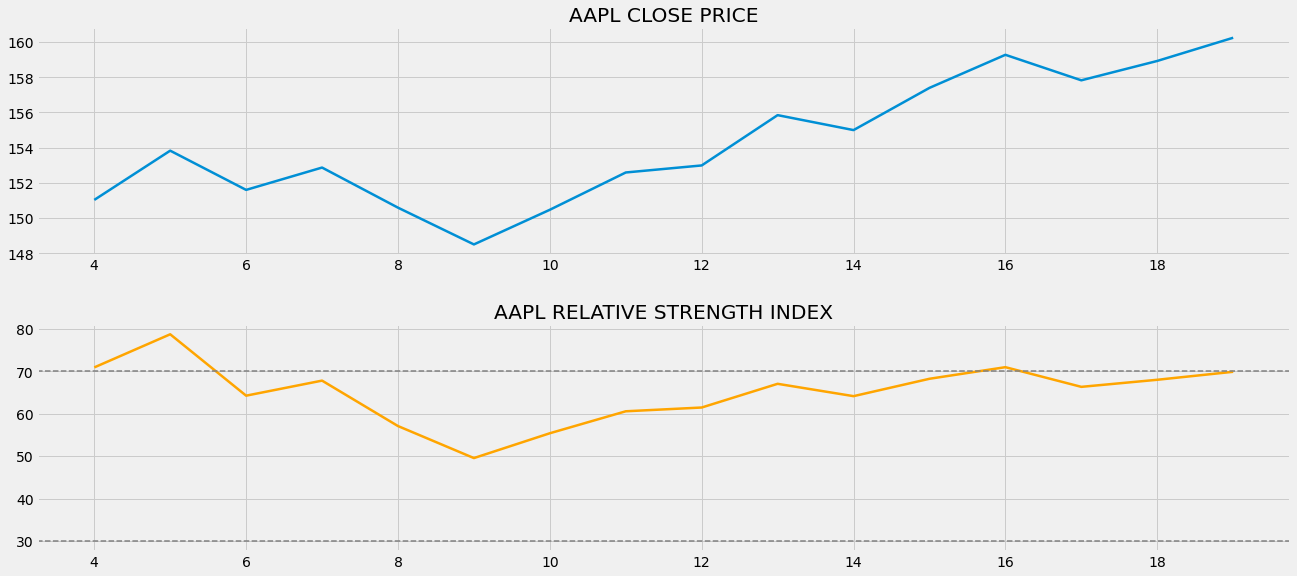

In [20]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(hist_data['Close'], linewidth = 2.5)
ax1.set_title(f'{ticker} CLOSE PRICE')
ax2.plot(hist_data['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title(f'{ticker} RELATIVE STRENGTH INDEX')
plt.show()